## Edge Detection with OpenCV

Edge detection is needed to detect objects in a picture. An edge is mathematically defined as a distinct change in pixel value. 

In [1]:
import numpy as np
import cv2 as cv2


%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#Routine to fix 
def fixColor(image):
    return(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

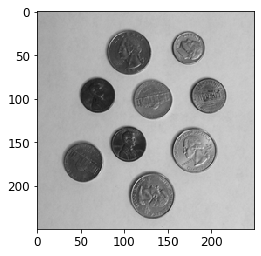

In [19]:
image = cv2.imread("images/coins.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(fixColor(image))

### Laplacian

The Laplacian involves calculating the double derivative of pixel values. In an ideal scenario the edge the first derivative is highest and the second derivative is 0. This is the fundamental idea behind Laplacian edge detection.

The laplacian use a 64 bit float representation as opposed to an 8-bit representation used for images before. This is because edges definations can be +ve (black-white) and -ve (white-black). 8-bit representation is no longer sufficient.

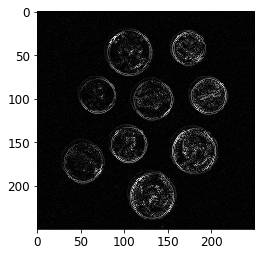

In [20]:
lap = cv2.Laplacian(image, cv2.CV_64F)
lap = np.uint8(np.absolute(lap))
plt.imshow(fixColor(lap))

### Sobel 

Sobel filters involve a matrix convolution that gives and approximate derivate and therefore gradient. These filters are applied both horizontally and vertically.

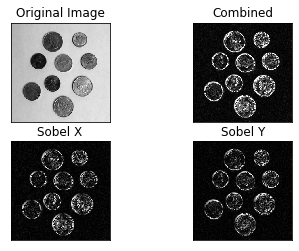

In [21]:
sobelX = cv2.Sobel(image, cv2.CV_64F, 1, 0)
sobelY = cv2.Sobel(image, cv2.CV_64F, 0, 1)
sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))
sobelCombined = cv2.bitwise_or(sobelX, sobelY)
titles = ['Original Image', 'Combined',
            'Sobel X', 'Sobel Y']
images = [image, sobelCombined, sobelX, sobelY]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

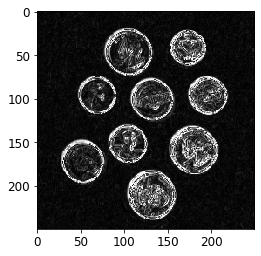

In [28]:
plt.imshow(fixColor(sobelCombined))

### Canny Edge Detector

The Canny edge detector is a multi-step process. It involves blurring the image to remove noise, computing Sobel 
gradient images in the x and y direction, suppressing edges, and finally a hysteresis thresholding stage that 
determines if a pixel is “edge-like” or not.

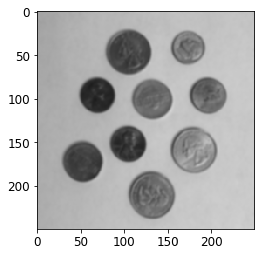

In [29]:
image = cv2.imread("images/coins.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(image, (5, 5), 0)
plt.imshow(fixColor(blurred))

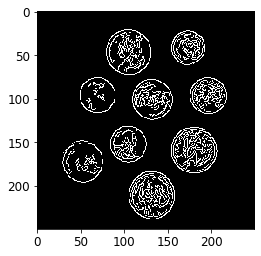

In [30]:
canny = cv2.Canny(image, 30, 150)
plt.imshow(fixColor(canny))

In [31]:
(cnts, _) = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL, cv2 .CHAIN_APPROX_SIMPLE)

In [32]:
print("I count {} coins in this image".format(len(cnts)))

I count 18 coins in this image
